## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
- The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.

## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\Vaibhav\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing Scikit Libraries


In [2]:
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data cleaning


- `Id` is not valuable feature so we can drop it.

In [6]:
df = df.drop('Id', axis=1)

- Null values percentage details

In [7]:
# null_data = round((df.isna().sum()/len(df.index)*100).sort_values(ascending=False), 2)
null_data = round((df.isnull().sum()).sort_values(ascending=False), 2)
null_data[null_data > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

### There are many features with Nan values.
- Features `MasVnrArea, MasVnrType, Electrical` have less than 1% of NaN values.
- Features `BsmtExposure, BsmtFinType2, BsmtCond, BsmtQual, BsmtFinType1` have around 2.5 to 2.6% of NaN values.
- Features `GarageYrBlt, GarageCond, GarageType, GarageFinish, GarageQual` have around 5.5% of NaN values.
- Features `FireplaceQu and LotFrontage` have resp 47% and 17% of NaN values.
- Features `PoolQC, MiscFeature, Alley, Fence` have greater than 80% of NaN values.

#### For `Electrical` column we have only one record with NaN values, we can replace it with mode `SBrkr`

In [8]:
# fill with 'SBrkr'
df['Electrical'].fillna(df.Electrical.mode()[0], inplace=True)

#### As per data dictionary there is category `None` for `MasVnrType`, we can replace NaN as None and for `MasVnrArea` we can replace NaN as 0

In [9]:
df['MasVnrType'] = df['MasVnrType'].fillna("None")
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

#### As per data dictionary column `BsmtExposure, BsmtFinType2, BsmtCond, BsmtQual, BsmtFinType1` have category `NA`, we can replace NaN as NA

In [10]:
na_features = ['BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1']
df[na_features] = df[na_features].fillna("NA")

#### Instead of using year columns as it is we can derive age columns.

In [11]:
year_column = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt', 'MoSold']
df[year_column].head()

,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt,MoSold
0,2003,2003,2008,2003.0,2
1,1976,1976,2007,1976.0,5
2,2001,2002,2008,2001.0,9
3,1915,1970,2006,1998.0,2
4,2000,2000,2008,2000.0,12


In [12]:
df['YearBuilt_age'] = df.YearBuilt.max() - df.YearBuilt
df['YearRemodAdd_age'] = df.YearRemodAdd.max() - df.YearRemodAdd
df['YrSold_age'] = df.YrSold.max() - df.YrSold
df['GarageYrBlt_age'] = df.GarageYrBlt.max() - df.GarageYrBlt

In [13]:
df[['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt', 'YearBuilt_age', 'YearRemodAdd_age', 'YrSold_age', 'GarageYrBlt_age']].head()

,YearBuilt,YearRemodAdd,YrSold,GarageYrBlt,YearBuilt_age,YearRemodAdd_age,YrSold_age,GarageYrBlt_age
0,2003,2003,2008,2003.0,7,7,2,7.0
1,1976,1976,2007,1976.0,34,34,3,34.0
2,2001,2002,2008,2001.0,9,8,2,9.0
3,1915,1970,2006,1998.0,95,40,4,12.0
4,2000,2000,2008,2000.0,10,10,2,10.0


#### Lets drop the Year columns

In [14]:
df = df.drop(year_column, axis=1)

#### As per data dictionary column `GarageCond, GarageType, GarageFinish, GarageQual` have category `NA`, we can replace NaN as mode of column

In [15]:
df['GarageType'].fillna(df.GarageType.mode()[0], inplace=True)
df['GarageFinish'].fillna(df.GarageFinish.mode()[0], inplace=True)
df['GarageQual'].fillna(df.GarageQual.mode()[0], inplace=True)
df['GarageCond'].fillna(df.GarageCond.mode()[0], inplace=True)
df['GarageYrBlt_age'].fillna(-1, inplace=True)

#### Check outlier for feature `LotFrontage`  and replace NaN values with mean of  LotFrontage groupby LotConfig

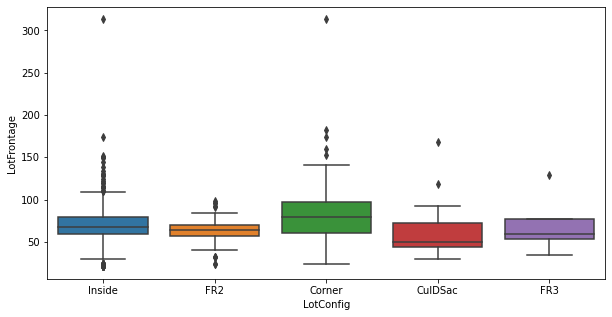

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = "LotConfig", y = "LotFrontage", data = df)
plt.show()

Here we can see that there are outliers present for category `Inside` and `Corner`. We can drop those

In [17]:
lot_frontage_out = df[(df['LotFrontage'] > 300) & (df['LotConfig'].isin(['Inside' ,'Corner']))]
lot_frontage_out

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,YearBuilt_age,YearRemodAdd_age,YrSold_age,GarageYrBlt_age
934,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,...,NaN,NaN,0,WD,Normal,242000,50,3,2,50.0
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,NaN,NaN,0,New,Partial,160000,2,2,2,2.0


In [18]:
df = df.drop(lot_frontage_out.index, axis=0)
# replace NaN with mean of LotFrontage
df['LotFrontage'] = df.groupby('LotConfig')['LotFrontage'].transform(lambda v: v.fillna(v.mean()))

#### Drop features `PoolQC, MiscFeature, Alley, Fence` having greater than 80% of NaN values.

In [19]:
drop_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df = df.drop(drop_features, axis=1)

#### As per data dictionary column FireplaceQu have category NA, we can replace NaN as NA


In [20]:
df['FireplaceQu'] = df['FireplaceQu'].fillna("NA")

#### Now we are done with handling NaN values.

### Encoding numerical data

As per data dictionary `MSSubClass, OverallCond and OverallQual` are categorical and type is int so convert it to categorical data 

In [21]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['OverallQual'] = df['OverallQual'].astype(str)

### Plot heatmap to check multicolinearity

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1458 non-null   object 
 1   MSZoning          1458 non-null   object 
 2   LotFrontage       1458 non-null   float64
 3   LotArea           1458 non-null   int64  
 4   Street            1458 non-null   object 
 5   LotShape          1458 non-null   object 
 6   LandContour       1458 non-null   object 
 7   Utilities         1458 non-null   object 
 8   LotConfig         1458 non-null   object 
 9   LandSlope         1458 non-null   object 
 10  Neighborhood      1458 non-null   object 
 11  Condition1        1458 non-null   object 
 12  Condition2        1458 non-null   object 
 13  BldgType          1458 non-null   object 
 14  HouseStyle        1458 non-null   object 
 15  OverallQual       1458 non-null   object 
 16  OverallCond       1458 non-null   object 


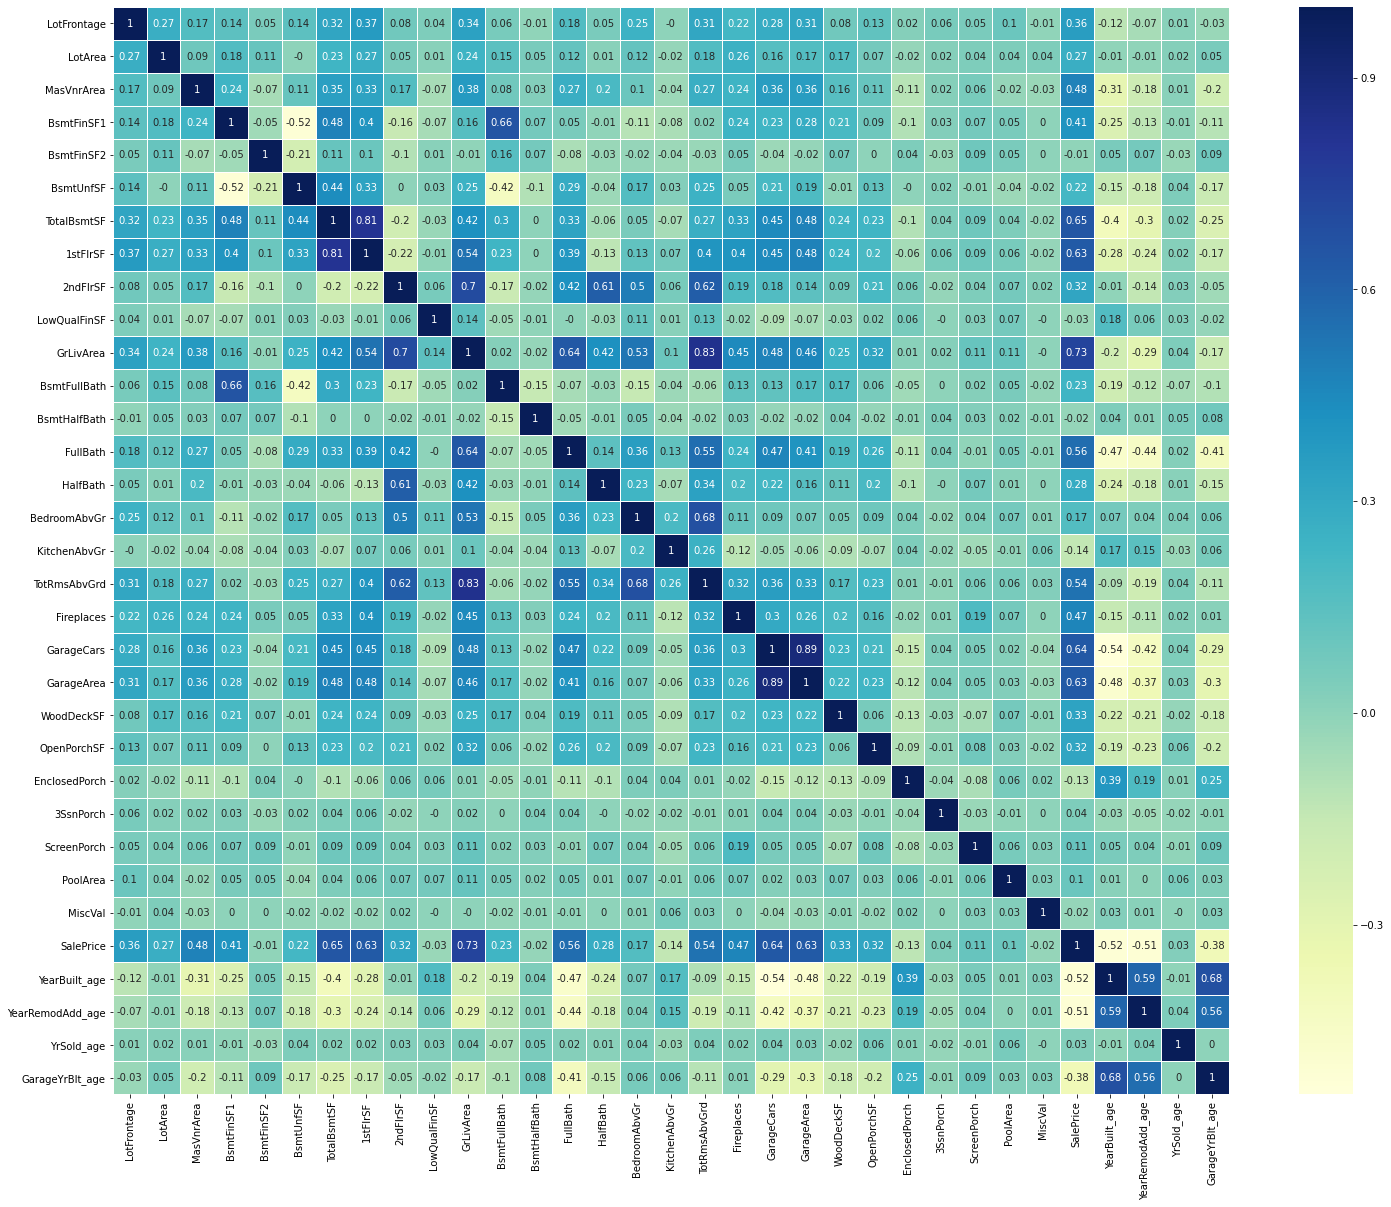

In [23]:
plt.figure(figsize=(25,20))
ax = sns.heatmap(round(df.corr(), 2), annot = True, cmap="YlGnBu", linewidth = 0.5)
plt.show()

90% of data is of same value, we can drop this

In [24]:
df.drop(['PoolArea', 'Utilities'], axis=1, inplace=True)

In [25]:
df.shape

(1458, 73)

### Check for outliers

In [26]:
num_col = ['LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF', 'GrLivArea','OpenPorchSF',
           'EnclosedPorch', 'ScreenPorch', 'LotFrontage',]

In [27]:
# function to plot scatter plot
def plot_scatter(column_to_category, data, row=3, col=3):
    plt.figure(figsize=(25, 35))
    for i in range(0, len(column_to_category)):
        plt.subplot(row, col, i+1)
        plt.scatter(x = column_to_category[i], y = 'SalePrice', data = data)
        plt.title(f"{column_to_category[i]}" ,fontsize=20)
    plt.show()

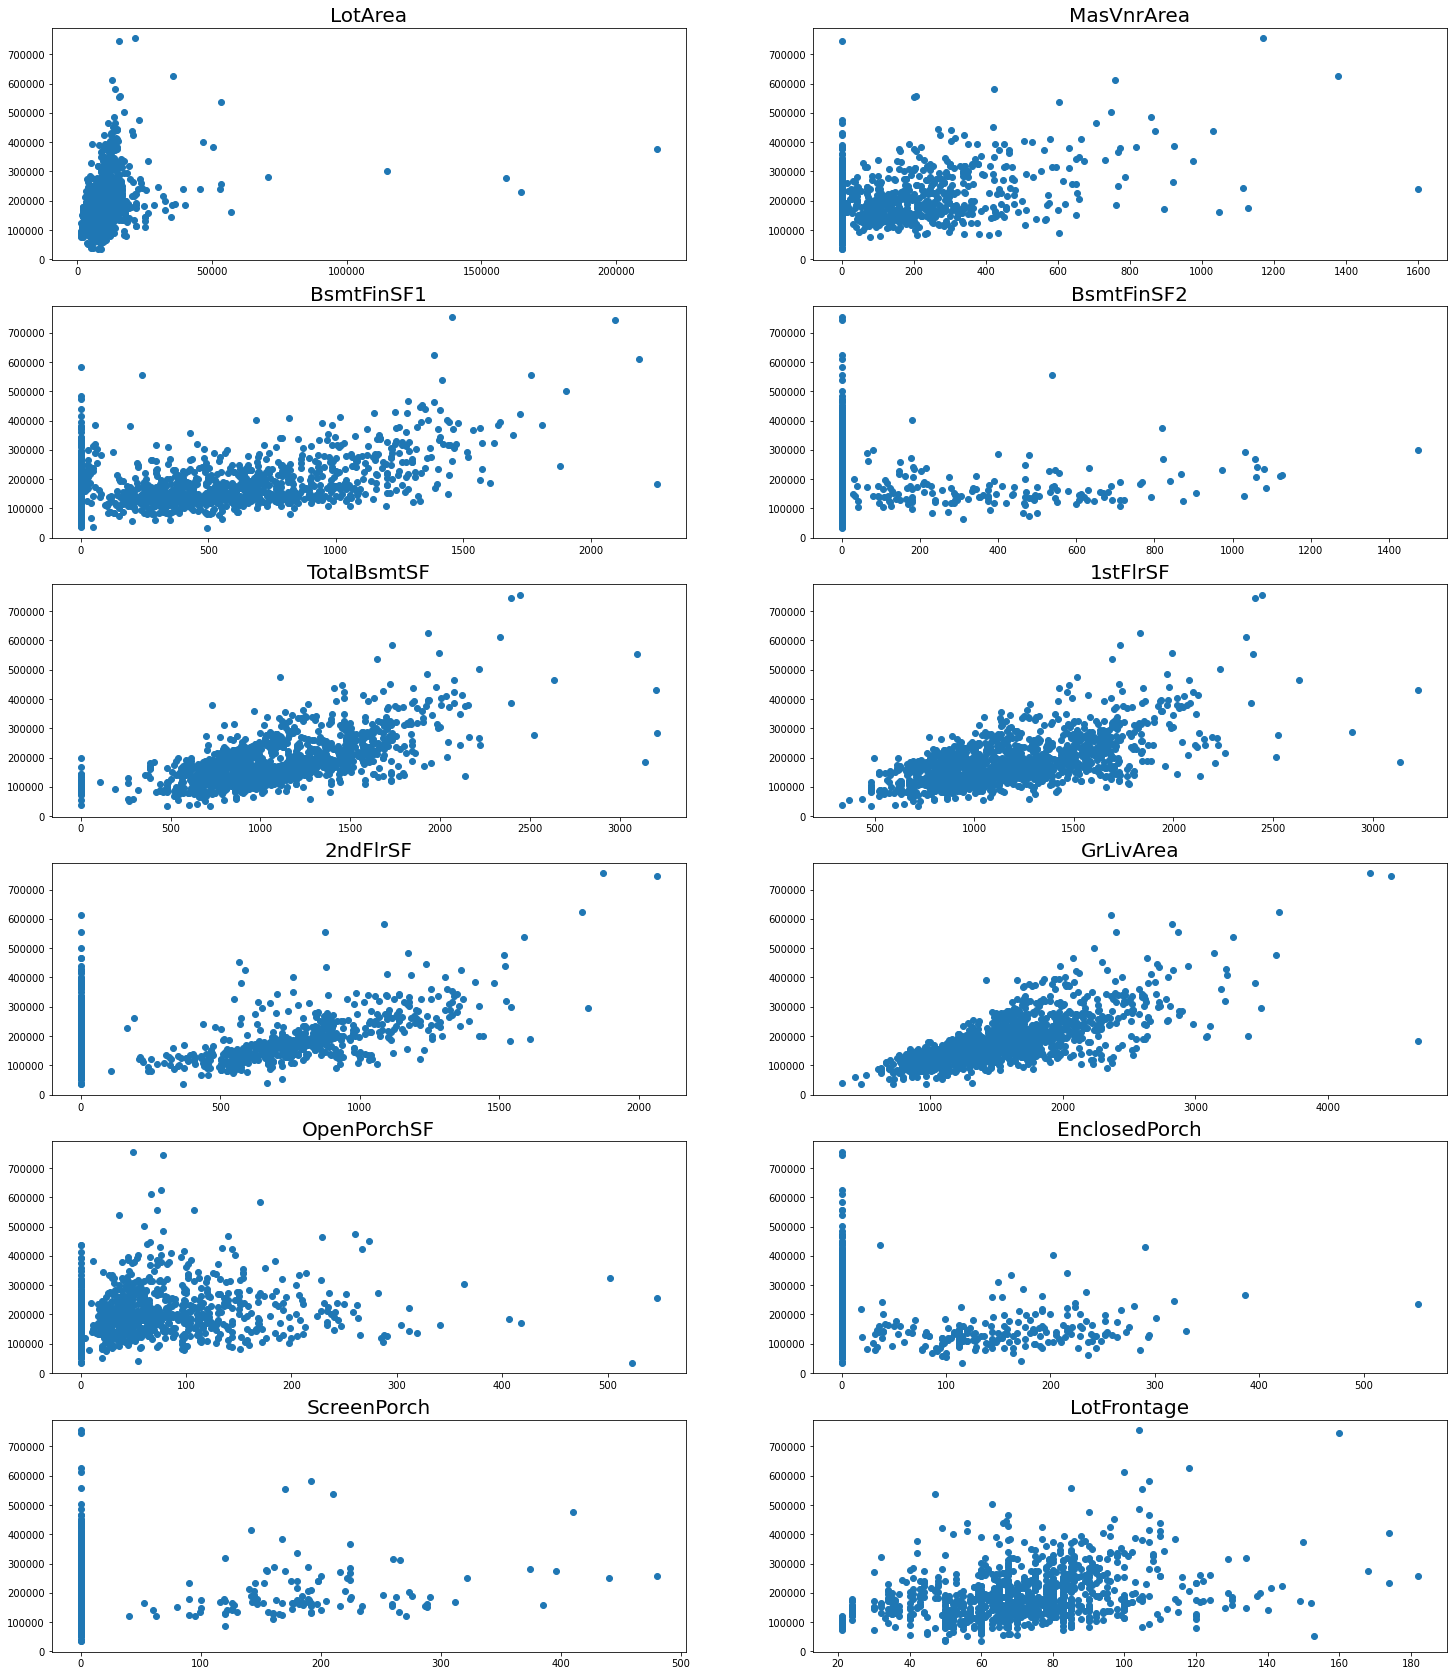

In [28]:
# call func to plot scatter plot
plot_scatter(num_col, df, row=7, col=2)

#### Function to remove outliers

In [29]:
def drop_outliers(data):
    list = []
    for col in num_col:
        Q1 = data[col].quantile(.20)
        Q3 = data[col].quantile(.97)
        IQR = Q3-Q1
        # get value betwn upper and lower bound
        data =  data[(data[col] >= (Q1-(1.5*IQR))) & (data[col] <= (Q3+(1.5*IQR)))] 

    return data

In [30]:
df = drop_outliers(df)
df.shape

(1442, 73)

#### Features which are ordinal in nature.

In [31]:
ord_col = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond']

In [32]:
df[ord_col].head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,GarageCond
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,RFn,TA,TA
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,RFn,TA,TA
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,RFn,TA,TA
3,IR1,Gtl,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Unf,TA,TA
4,IR1,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,RFn,TA,TA


#### Map this with label encoding

In [33]:
# for loop to create dictionary of labels as follow {"high":0, "low": 1} for all ordinal columns
ord_col_map = {}

for col in ord_col:
    unique_val_list = df[col].unique()
    temp_dict = {}
    for i in range(len(unique_val_list)):
        temp_dict[unique_val_list[i]] = i
    ord_col_map[col] = temp_dict

In [34]:
# for loop to map as follow df['feature'] = df['feature'].map({"high":0, "low": 1})
for key, value in ord_col_map.items():
    df[key] = df[key].map(value)

In [35]:
df[ord_col].head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,GarageCond
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,1,0,0,1,0,0,0
2,1,0,0,0,0,0,2,0,0,0,0,0,0,0
3,1,0,1,0,1,1,0,1,0,1,0,1,0,0
4,1,0,0,0,0,0,3,0,0,0,0,0,0,0


#### Create two dataframe with numeric values and categorical values.

In [36]:
numeric_features = df.select_dtypes(exclude='object')
non_numeric_features = df.select_dtypes(include='object')

#### Create list of numeric columns that can be used for scaling

In [37]:
scale_columns = list(numeric_features.columns)

In [38]:
for x in ord_col:
    if x in scale_columns:
        scale_columns.remove(x)

#### Create dummy data for categorical features

In [39]:
dummy_features = pd.get_dummies(non_numeric_features, drop_first=True)

In [40]:
# create new dataframe after creating dummy var
new_df = pd.concat([numeric_features, dummy_features], axis=1)
new_df.head()

,LotFrontage,LotArea,LotShape,LandSlope,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0,0,196.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0,0,0.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,1,0,162.0,0,0,0,0,2,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1,0,0.0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,1,0,350.0,0,0,0,0,3,...,0,0,0,0,1,0,0,0,1,0


In [41]:
new_df.shape

(1442, 228)

### Distribution of target variable `SalePrice` before scaling and Splitting

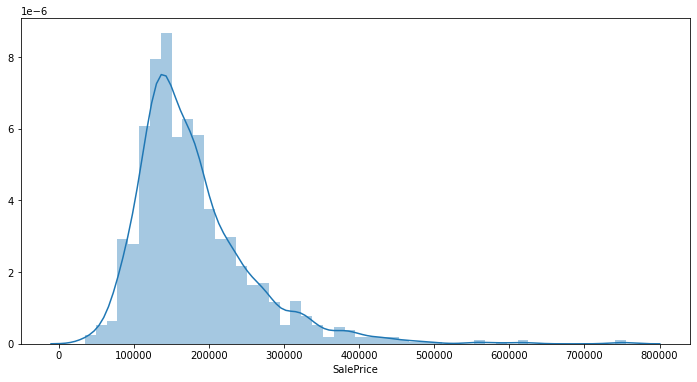

In [42]:
plt.figure(figsize=(12,6))
sns.distplot(new_df['SalePrice'])
plt.show()

## Splitting the Data into Training and Testing Sets


### Split the data into two part
- Train data (almost 70% of total data)
- Test data (almost 30% of total data)

In [43]:
df_train, df_test = train_test_split(new_df, train_size = 0.7,  random_state = 100)

In [44]:
print("X train data size ->", df_train.shape)
print("X test data size ->", df_test.shape)

X train data size -> (1009, 228)
X test data size -> (433, 228)


### Rescaling the Features.


#### Scaling train data

In [45]:
scale_columns.remove('SalePrice')

In [46]:
scaler = StandardScaler()
df_train[scale_columns] = scaler.fit_transform(df_train[scale_columns])

#### Scaling test data

In [47]:
scaler = StandardScaler()
df_test[scale_columns] = scaler.fit_transform(df_test[scale_columns])

#### Scale the target variable

In [48]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

df_test['SalePrice'] = np.log(df_test['SalePrice'])

### Distribution of target variable `SalePrice` after scaling and Splitting

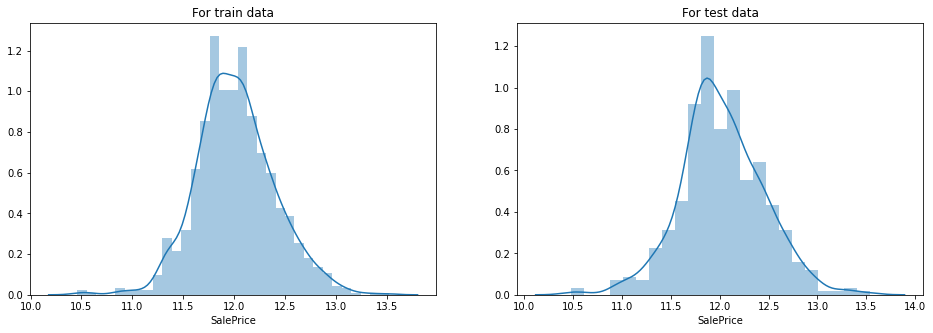

In [49]:
plt.figure(figsize=(16, 5))

plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice)
plt.title("For train data")

plt.subplot(1,2,2)
sns.distplot(df_test.SalePrice)
plt.title("For test data")

plt.show()

#### Split train data => Predictors and response variables

In [50]:
y_train = df_train.pop('SalePrice')
X_train = df_train

#### Split test data => Predictors and response variables

In [51]:
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Function to calculate R2 score, RSS and MSE

In [52]:
def model_eval(model):
    # Lets calculate some metrics such as R2 score, RSS and RMSE
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("R2 score for train:", r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R2 score for test:", r2_test_lr)
    metric.append(r2_test_lr)
    print("--"*20)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print("RSS for train:", rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print("RSS for test:", rss2_lr)
    metric.append(rss2_lr)
    print("--"*20)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("MSE for train:", mse_train_lr)
    metric.append(mse_train_lr)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("MSE for test:", mse_test_lr)
    metric.append(mse_test_lr)
    print("--"*20)
    
    rmse_train_lr = mse_train_lr**0.5
    print("RMSE for train:", rmse_train_lr)
    metric.append(rmse_train_lr)
    
    rmse_test_lr = mse_test_lr**0.5
    print("RMSE for test:", rmse_test_lr)
    metric.append(rmse_test_lr)
    print("--"*20)
    
    return metric, y_pred_train, y_pred_test

## Building Linear Regression Model with all features

In [53]:
# Create linear regression object
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# returns metric (r2, rss, mse, rmse), train prediction, test prediction
metric, y_pred_train, y_pred_test = model_eval(reg)

R2 score for train: 0.9481043970597808
R2 score for test: -7.634555618577347e+20
----------------------------------------
RSS for train: 7.698030339215714
RSS for test: 5.9966182735671344e+22
----------------------------------------
MSE for train: 0.007629366044812402
MSE for test: 1.384900294126359e+20
----------------------------------------
RMSE for train: 0.0873462423050494
RMSE for test: 11768178678.650146
----------------------------------------


In [55]:
residual = y_train - y_pred_train

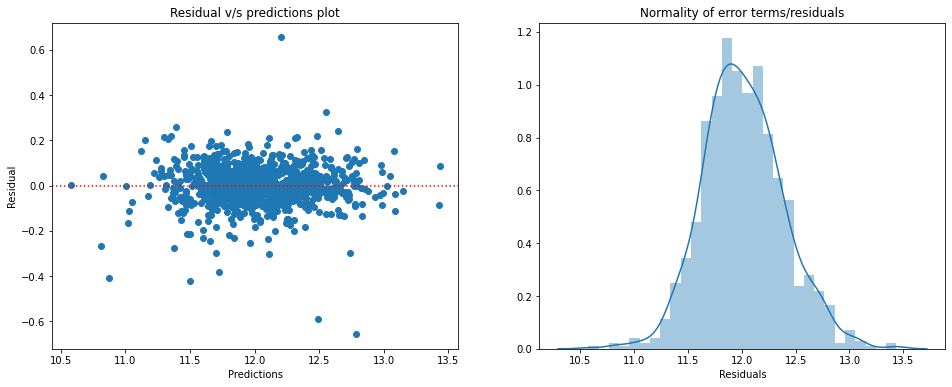

In [56]:
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.scatter(y_pred_train , residual)
plt.axhline(y=0, color='r', linestyle=':')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title("Residual v/s predictions plot")


plt.subplot(1,2,2)
sns.distplot(y_pred_train, kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")

plt.show()

#### List of alphas to tune

In [57]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 15.0, 20, 50, 250, 500]}

## Ridge Regression

### 1. Improve model with the optimal value of alpha using GridSearchCV

In [58]:
ridge = Ridge()
folds = 5

ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 12.0, 15.0, 20, 50, 250, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [59]:
cv_result_rg = pd.DataFrame(ridge_model_cv.cv_results_)
cv_result_rg['param_alpha'] = cv_result_rg['param_alpha'].astype('float32')
cv_result_rg.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006248,0.007653,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.875190,0.900255,0.831425,0.785688,...,0.850979,0.039489,30,0.950232,0.947946,0.958158,0.965173,0.951602,0.954622,0.006273
1,0.006248,0.007652,0.000000,0.000000,0.0002,{'alpha': 0.0002},0.875243,0.900263,0.831456,0.785727,...,0.851010,0.039483,29,0.950232,0.947946,0.958158,0.965173,0.951602,0.954622,0.006273
2,0.003133,0.006267,0.000000,0.000000,0.0005,{'alpha': 0.0005},0.875401,0.900290,0.831548,0.785846,...,0.851105,0.039465,28,0.950232,0.947946,0.958158,0.965172,0.951601,0.954622,0.006273
3,0.009315,0.006990,0.001197,0.000977,0.0010,{'alpha': 0.001},0.875662,0.900334,0.831702,0.786041,...,0.851262,0.039436,27,0.950232,0.947945,0.958158,0.965172,0.951601,0.954622,0.006273
4,0.007778,0.002075,0.001395,0.000797,0.0100,{'alpha': 0.01},0.879757,0.901110,0.834348,0.788995,...,0.853767,0.039027,26,0.950185,0.947914,0.958147,0.965122,0.951554,0.954584,0.006273


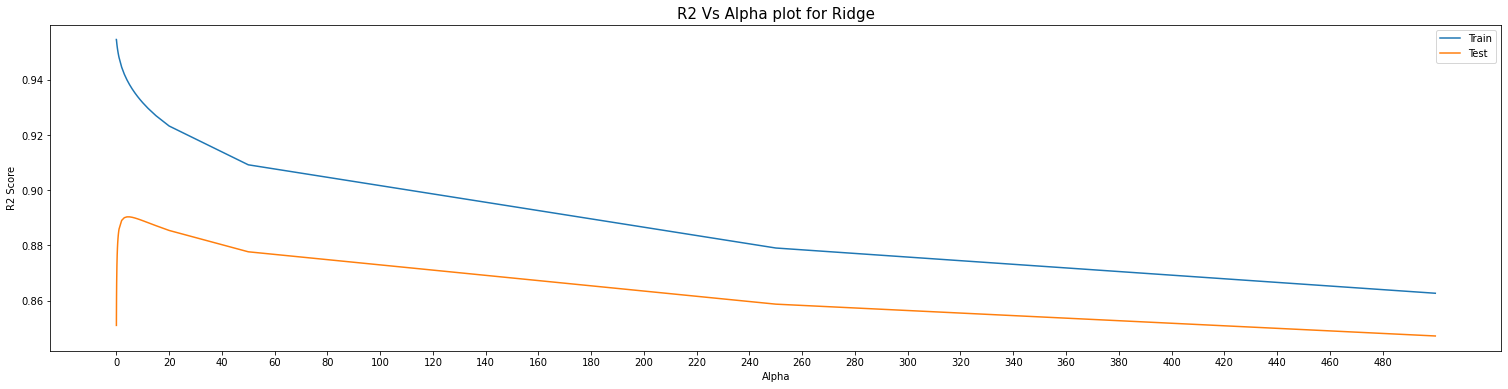

In [60]:
plt.figure(figsize=(26, 6))
plt.plot(cv_result_rg['param_alpha'], cv_result_rg['mean_train_score'], label='Train')
plt.plot(cv_result_rg['param_alpha'], cv_result_rg['mean_test_score'], label='Test')
# plt.xscale('log')

# plt.xlim(0, 500)
plt.xticks(np.arange(0, 500, 20))

plt.title("R2 Vs Alpha plot for Ridge", fontdict={'fontsize': 15})
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend()
plt.show()

In [61]:
# Printing the best hyperparameter alpha
print("Best alpha for ridge:", ridge_model_cv.best_params_)

Best alpha for ridge: {'alpha': 4.0}


### 2. Create model using best alpha for ridge

In [62]:
alpha = ridge_model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=4.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
# returns metric (r2, mse, rss), train prediction, test prediction
ridge_metric, y_pred_train_rg, y_pred_test_rg = model_eval(ridge)

R2 score for train: 0.9368426441687695
R2 score for test: 0.8961120177844649
----------------------------------------
RSS for train: 9.36856330378346
RSS for test: 8.159958531728963
----------------------------------------
MSE for train: 0.009284998318913242
MSE for test: 0.01884516981923548
----------------------------------------
RMSE for train: 0.09635869612501635
RMSE for test: 0.1372777105696168
----------------------------------------


## Lasso Regression

### 1.Improve model with the optimal value of alpha using GridSearchCV

In [64]:
lasso = Lasso()
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0, 12.0, 15.0, 20, 50, 250, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [65]:
cv_result_ls = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_ls['param_alpha'] = cv_result_ls['param_alpha'].astype('float32')
# cv_result_ls[['param_alpha', 'mean_train_score', 'mean_test_score']].head()

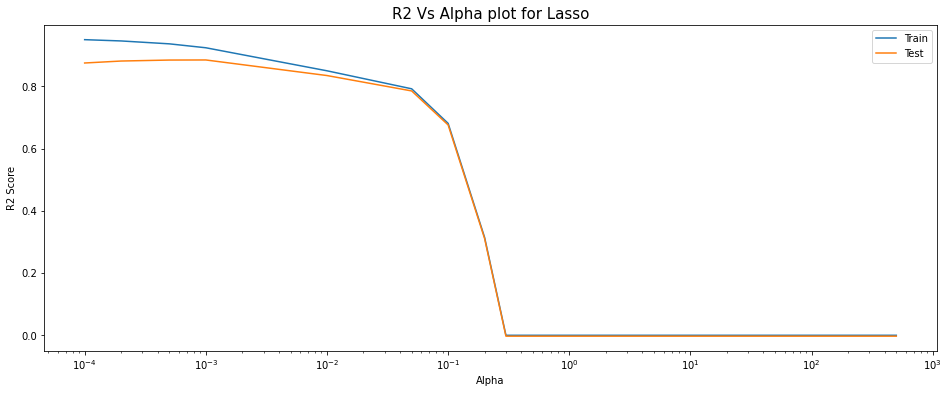

In [66]:
plt.figure(figsize=(16, 6))
plt.plot(cv_result_ls['param_alpha'], cv_result_ls['mean_train_score'], label='Train')
plt.plot(cv_result_ls['param_alpha'],cv_result_ls['mean_test_score'], label='Test')
plt.xscale('log')
plt.title("R2 Vs Alpha plot for Lasso", fontdict={'fontsize': 15})
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend()
plt.show()

In [67]:
# Printing the best hyperparameter alpha
print("Best alpha for lasso:", lasso_model_cv.best_params_)

Best alpha for lasso: {'alpha': 0.001}


### 2. Create model using best alpha for lasso

In [68]:
alpha = lasso_model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
# returns metric (r2, mse, rss), train prediction, test prediction
lasso_metric, y_pred_train_ls, y_pred_test_ls = model_eval(lasso)

R2 score for train: 0.9178155584241118
R2 score for test: 0.8982847056090886
----------------------------------------
RSS for train: 12.190981293568854
RSS for test: 7.989303156841241
----------------------------------------
MSE for train: 0.012082241123457734
MSE for test: 0.0184510465515964
----------------------------------------
RMSE for train: 0.1099192481936523
RMSE for test: 0.13583462942709565
----------------------------------------


### Checking for assumptions

 1. Residual v/s predictions plot
 2. Normality of error terms/residuals

In [70]:
# residual for ridge regression
residual_rg = y_train - y_pred_train_rg

# residual for lasso regression
residual_ls = y_train - y_pred_train_ls

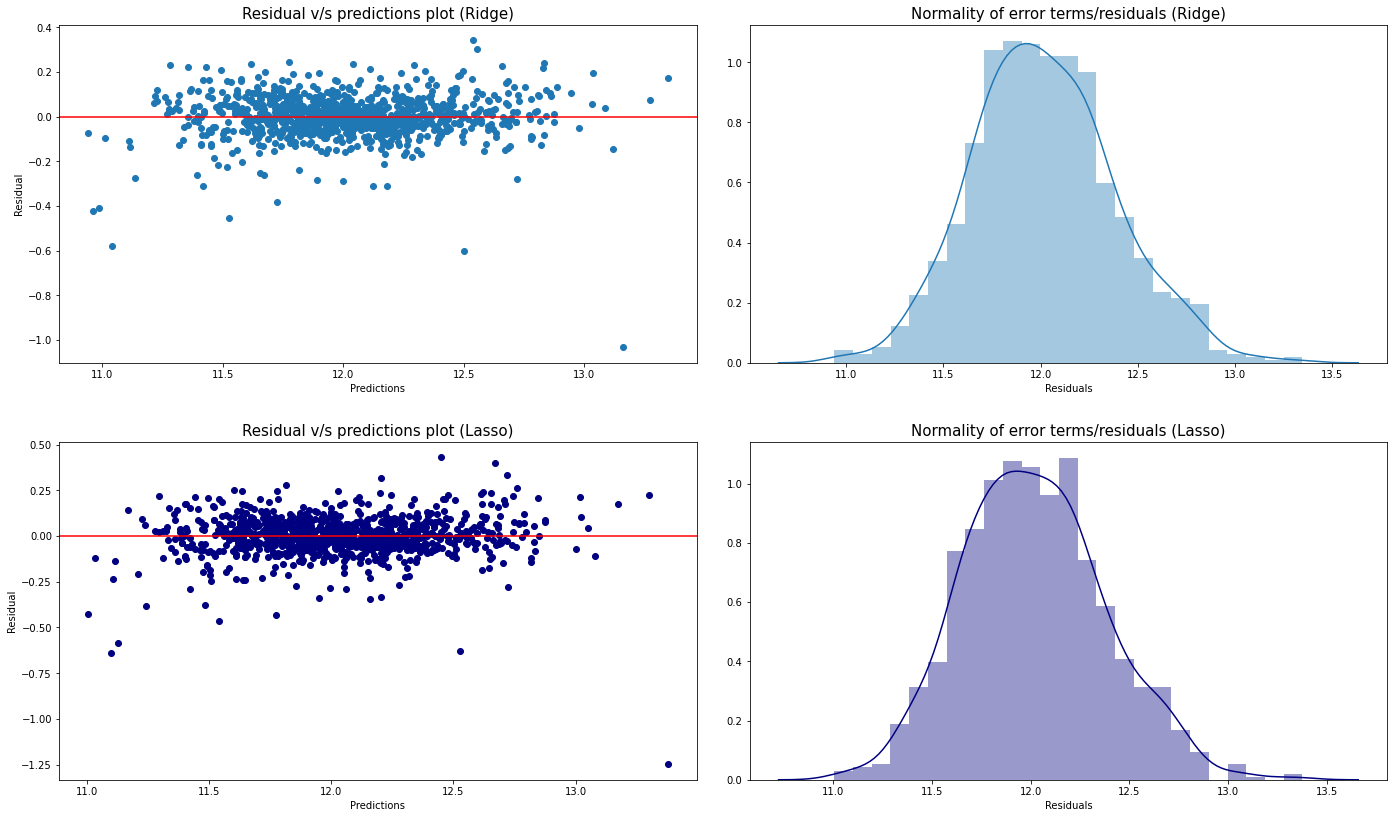

In [71]:
plt.figure(figsize=(20, 12))

# plot for ridge
plt.subplot(2,2,1)
plt.scatter(y_pred_train_rg , residual_rg)
plt.axhline(y=0, color='r', linestyle='-')
# plt.yscale('log')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title("Residual v/s predictions plot (Ridge)", fontdict={'fontsize': 15})

plt.subplot(2,2,2)
sns.distplot(y_pred_train_rg, kde=True)
plt.title('Normality of error terms/residuals (Ridge)', fontdict={'fontsize': 15})
plt.xlabel("Residuals")

# plot for lasso
plt.subplot(2,2,3)
plt.scatter(y_pred_train_ls , residual_ls, color='navy')
plt.axhline(y=0, color='r', linestyle='-')
# plt.yscale('log')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.title("Residual v/s predictions plot (Lasso)", fontdict={'fontsize': 15})


plt.subplot(2,2,4)
sns.distplot(y_pred_train_ls, color='navy', kde=True)
plt.title('Normality of error terms/residuals (Lasso)', fontdict={'fontsize': 15})
plt.xlabel("Residuals")

plt.tight_layout(pad=3)
plt.show()

### Model Evaluation

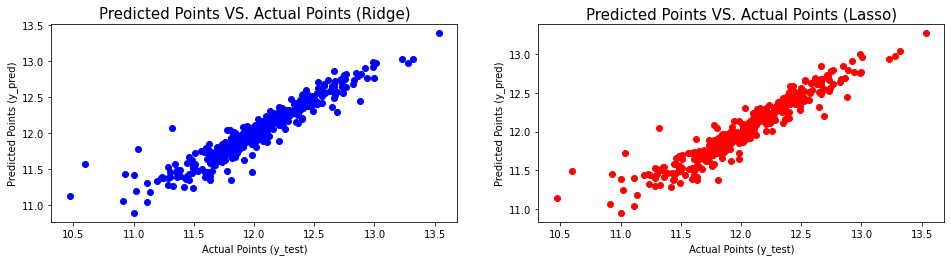

In [72]:
plt.figure(figsize = (16, 8))

plt.subplot(2,2,1)
plt.scatter(x=y_test, y=y_pred_test_rg, color='b')
plt.title('Predicted Points VS. Actual Points (Ridge)', fontdict={'fontsize': 15})
plt.xlabel('Actual Points (y_test)', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points (y_pred)', fontdict={'fontsize': 10})


plt.subplot(2,2,2)
plt.scatter(x=y_test, y=y_pred_test_ls, color='r')
plt.title('Predicted Points VS. Actual Points (Lasso)', fontdict={'fontsize': 15})
plt.xlabel('Actual Points (y_test)', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points (y_pred)', fontdict={'fontsize': 10})

plt.show()

## The changes in the coefficients after regularization

In [73]:
# get coefficients
reg_coef = list(reg.coef_)
ridge_coef = list(ridge.coef_)
lasso_coef = list(lasso.coef_)

# get intercept
reg_coef.insert(0, reg.intercept_)
ridge_coef.insert(0, ridge.intercept_)
lasso_coef.insert(0, lasso.intercept_)

# get columns name
ind = list(df_train.columns)
ind.insert(0, "constant")

In [74]:
betas = pd.DataFrame(index=ind)
betas.rows = ind

betas['Linear'] = reg_coef
betas['Ridge'] = ridge_coef
betas['Lasso'] = lasso_coef

pd.set_option('display.max_rows', None)

#### Sort by lasso coefficients

In [75]:
betas.reindex(betas.Lasso.abs().sort_values(ascending=False).index)

,Linear,Ridge,Lasso
constant,-3.634114e+10,11.549178,11.769019
OverallCond_3,1.041321e+10,-0.157310,-0.169498
OverallQual_9,7.534722e-01,0.145381,0.145914
Condition2_PosN,-5.395993e-01,-0.182120,-0.119545
GrLivArea,-2.562777e+11,0.057129,0.111127
OverallQual_3,3.983646e-01,-0.122439,-0.097588
Neighborhood_Crawfor,9.083251e-02,0.084407,0.090009
Functional_Typ,1.659419e-02,0.073049,0.081765
OverallQual_8,6.615761e-01,0.077686,0.078736
OverallQual_4,4.712321e-01,-0.076353,-0.069536


#### Sort by Ridge coefficients

In [76]:
betas.reindex(betas.Ridge.abs().sort_values(ascending=False).index)

,Linear,Ridge,Lasso
constant,-3.634114e+10,11.549178,11.769019
Condition2_PosN,-5.395993e-01,-0.182120,-0.119545
OverallCond_3,1.041321e+10,-0.157310,-0.169498
OverallQual_9,7.534722e-01,0.145381,0.145914
Condition2_Norm,4.044879e-01,0.130507,0.044014
OverallQual_3,3.983646e-01,-0.122439,-0.097588
Neighborhood_StoneBr,1.386360e-01,0.119085,0.062196
OverallQual_10,8.441940e-01,0.104455,0.001797
OverallCond_9,1.041321e+10,0.096167,0.011238
SaleCondition_Alloca,2.290245e-01,0.093654,0.000000


## Creating a table which contain all the metrics

In [77]:
metric_list = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)']

metric_name = pd.Series(metric_list, name = 'Metric')
lr_metric = pd.Series(metric, name = 'Linear Regression')
rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([metric_name, rg_metric, ls_metric], axis = 1)
# final_metric = pd.concat([metric_name, lr_metric, rg_metric, ls_metric], axis = 1)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.9368,0.9178
1,R2 Score (Test),0.8961,0.8983
2,RSS (Train),9.3686,12.1910
3,RSS (Test),8.1600,7.9893
4,MSE (Train),0.0093,0.0121
5,MSE (Test),0.0188,0.0185
6,RMSE (Train),0.0964,0.1099
7,RMSE (Test),0.1373,0.1358


In [78]:
print("Best alpha for ridge:", ridge_model_cv.best_params_)
print("Best alpha for lasso:", lasso_model_cv.best_params_)

Best alpha for ridge: {'alpha': 4.0}
Best alpha for lasso: {'alpha': 0.001}


#### Best alpha for Ridge: {'alpha': 4.0}

#### Best alpha for Lasso: {'alpha': 0.001} 

1. Model accuracy on train and test dataset for all models are similar, we would chosoe the simpler model.
2. Simple linear model is complex and it looks overfitting.
3. Ridge regression model is complex, we would not consider that.
4. Lasso regression model is simpler as most of the coefficients are zero , we would consider that.

## Models for assignment questions 2

### Question 1 : Double alpha

### 1. Ridge regression

###  Create model using double the value of alpha

In [79]:
alpha = ridge_model_cv.best_params_['alpha'] * 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=8.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
# returns metric (r2, mse, rss), train prediction, test prediction
ridge_metric, y_pred_train_rg, y_pred_test_rg = model_eval(ridge)

R2 score for train: 0.9316525962634524
R2 score for test: 0.8970168609130178
----------------------------------------
RSS for train: 10.138438668429249
RSS for test: 8.088886957815886
----------------------------------------
MSE for train: 0.01004800660894871
MSE for test: 0.018681032235140612
----------------------------------------
RMSE for train: 0.10023974565484846
RMSE for test: 0.13667857269938333
----------------------------------------


### 2. Lasso regression

### Create model using best alpha for lasso

In [81]:
alpha = lasso_model_cv.best_params_['alpha'] * 2
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
# returns metric (r2, mse, rss), train prediction, test prediction
lasso_metric, y_pred_train_ls, y_pred_test_ls = model_eval(lasso)

R2 score for train: 0.8997372302866622
R2 score for test: 0.8833421235488763
----------------------------------------
RSS for train: 14.87266356720381
RSS for test: 9.162979335432524
----------------------------------------
MSE for train: 0.014740003535385342
MSE for test: 0.021161615093377655
----------------------------------------
RMSE for train: 0.12140841624609615
RMSE for test: 0.1454703237549764
----------------------------------------


In [83]:
metric_list = ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)']

metric_name = pd.Series(metric_list, name = 'Metric')
lr_metric = pd.Series(metric, name = 'Linear Regression')
rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric_doub = pd.concat([metric_name, rg_metric, ls_metric], axis = 1)
# final_metric = pd.concat([metric_name, lr_metric, rg_metric, ls_metric], axis = 1)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

final_metric_doub

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.9317,0.8997
1,R2 Score (Test),0.8970,0.8833
2,RSS (Train),10.1384,14.8727
3,RSS (Test),8.0889,9.1630
4,MSE (Train),0.0100,0.0147
5,MSE (Test),0.0187,0.0212
6,RMSE (Train),0.1002,0.1214
7,RMSE (Test),0.1367,0.1455


## The changes in the coefficients after regularization

In [84]:
# get coefficients
reg_coef = list(reg.coef_)
ridge_coef = list(ridge.coef_)
lasso_coef = list(lasso.coef_)

# get intercept
reg_coef.insert(0, reg.intercept_)
ridge_coef.insert(0, ridge.intercept_)
lasso_coef.insert(0, lasso.intercept_)

# get columns name
ind = list(df_train.columns)
ind.insert(0, "constant")

In [85]:
betas = pd.DataFrame(index=ind)
betas.rows = ind

betas['Linear'] = reg_coef
betas['Ridge'] = ridge_coef
betas['Lasso'] = lasso_coef

pd.set_option('display.max_rows', None)

#### Sort by Ridge coefficients

In [86]:
# betas.sort_values(by='Lasso', ascending=False)
betas.reindex(betas.Ridge.abs().sort_values(ascending=False).index)

,Linear,Ridge,Lasso
constant,-36341141844.9059,11.6475,11.8878
OverallCond_3,10413211882.4506,-0.1290,-0.1016
OverallQual_9,0.7535,0.1198,0.1209
Condition2_PosN,-0.5396,-0.1108,-0.0000
OverallQual_3,0.3984,-0.1015,-0.0226
Neighborhood_StoneBr,0.1386,0.0964,0.0000
Condition2_Norm,0.4045,0.0941,0.0000
Neighborhood_Crawfor,0.0908,0.0774,0.0728
SaleCondition_Normal,0.0981,0.0770,0.0312
Neighborhood_NridgHt,0.0806,0.0755,0.0287


#### Sort by Lasso coefficients

In [87]:
betas.reindex(betas.Lasso.abs().sort_values(ascending=False).index)

,Linear,Ridge,Lasso
constant,-36341141844.9059,11.6475,11.8878
OverallQual_9,0.7535,0.1198,0.1209
GrLivArea,-256277747321.6643,0.0574,0.1152
OverallCond_3,10413211882.4506,-0.1290,-0.1016
Functional_Typ,0.0166,0.0711,0.0819
Neighborhood_Crawfor,0.0908,0.0774,0.0728
OverallQual_8,0.6616,0.0680,0.0685
YearBuilt_age,-0.0705,-0.0663,-0.0593
OverallQual_4,0.4712,-0.0716,-0.0506
TotalBsmtSF,24720414146.6619,0.0340,0.0461
